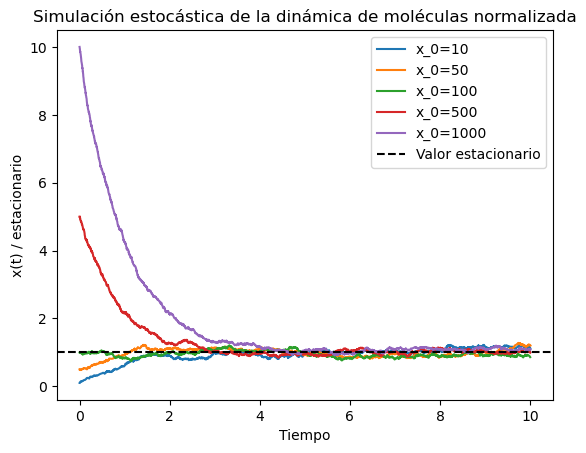

In [55]:
# importamos las librerias necesarias. 
# random no la incluimos ya que numpy tiene un modulo para trabajar con numeros random
import numpy as np # libreria numerica
import matplotlib.pyplot as plt # para graficar

# Inicializamos parámetros
alpha = 100
beta = 1
x0_valores = [10, 50, 100, 500,1000]
t_max = 10
estacionario = alpha / beta

# Definimos la función gillespie basada en el algoritmo de Guillespie
def gillespie(alpha, beta, x0, t_max):
    t = 0
    x = x0
    times = [t]
    moleculas = [x]

    # Crea un bucle que se ejecuta hasta que se alcanza el tiempo máximo
    while t < t_max:
        # Definimos las tasas de reacciones
        nu1 = alpha
        nu2 = beta * x
        
        # Suma de tasas de cambio
        cambio_total = nu1 + nu2
        
        # Tiempo hasta el próximo evento
        if cambio_total == 0:
            break # Detener las simulaciones si no hay reacciones
        tau = np.random.exponential(1 / cambio_total) # Definimos a tau como una exponencial debido a que sigue una dist. de Poisson
        
        # Actualizar el tiempo
        t += tau
        
        # Decidir cuál reacción ocurre
        if np.random.rand() < nu1 / cambio_total:
            x += 1  # Síntesis
        else:
            x = max(x - 1, 0)  # Degradación
        
        # Almacenar resultados
        times.append(t)
        moleculas.append(x)
    
    return np.array(times), np.array(moleculas) # retornamos las listas de los valores almacenados


# Graficamos cada una de las simulaciones
for x0 in x0_valores:
    times, moleculas = gillespie(alpha, beta, x0, t_max)
    plt.plot(times, moleculas / estacionario, label=f'x_0={x0}') # normalizamos dividiendo las moleculas entre el estacionario

plt.axhline(1, color='black', linestyle='--', label='Valor estacionario') # graficamos una linea punteada en el estacionario
plt.title('Simulación estocástica de la dinámica de moléculas normalizada')
plt.xlabel('Tiempo')
plt.ylabel('x(t) / estacionario')
plt.legend()
plt.show()


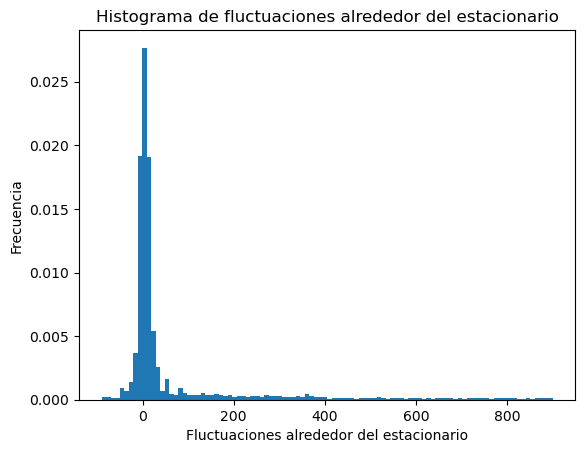

In [54]:
# Histograma de las fluctuaciones
fluctuaciones = [] # Creamos una lista donde se almacenaran los datos de las fluctuaciones

# Hacemos un bucle para los numeros de moleculas definidas anteriormente
for x0 in x0_valores:
    _, moleculas = gillespie(alpha, beta, x0, t_max)
    fluctuaciones.extend(moleculas - estacionario)

# Graficamos con 100 divisiones para una mejor apreciación
plt.hist(fluctuaciones, bins=100, density=True)
plt.xlabel('Fluctuaciones alrededor del estacionario')
plt.title('Histograma de fluctuaciones alrededor del estacionario')
plt.ylabel('Frecuencia')
plt.show()
